# IDAO bootcamp deep leanning

### Plans for this notebook:

1. Quick introduction in deep learning
2. **Pytorch** basics
3. Some details about learning pipeline
4. Build and apply simple fully connected nural network
5. Introduction to conv nets
6. Build and apply simple convolutional nural network
7. Discuss some other applications of DL



##### This notebook is strongly based on materials from:
1. https://github.com/hse-ds/iad-deep-learning
2. https://github.com/yandexdataschool/Practical_DL

# 1. Quick introduction in deep learning [mini-presentation](https://docs.google.com/presentation/d/1cc9n11O6I_18bunhgw8qfuJ7kp2ITD9hfIZsp_8lpJA/edit?usp=sharing)

# 2. Pytorch high level basics

#### 0. Set up enviroment if needed

In [ ]:
#!pip install pytorch
#!pip install numpy
#!pip install sklearn
#!pip install tqdm
#!pip install matplotlib

#### 1. Remembering numpy

In [1]:
import numpy as np

In [2]:
# random matrix
a = np.random.rand(5, 3)
a

array([[0.00508193, 0.33649948, 0.10164853],
       [0.93852453, 0.66995893, 0.35048145],
       [0.39270205, 0.49039629, 0.00990756],
       [0.21066918, 0.92552095, 0.15506579],
       [0.15784871, 0.13879107, 0.54150685]])

In [3]:
print(f"Shape: {a.shape}")

Shape: (5, 3)


In [4]:
print(f"Add 5:\n{a + 5}")

Add 5:
[[5.00508193 5.33649948 5.10164853]
 [5.93852453 5.66995893 5.35048145]
 [5.39270205 5.49039629 5.00990756]
 [5.21066918 5.92552095 5.15506579]
 [5.15784871 5.13879107 5.54150685]]


In [5]:
print(f"Matrix product X X^T:\n{a @ a.T}")

Matrix product X X^T:
[[0.12359015 0.26583627 0.16802087 0.32827014 0.10254867]
 [0.26583627 1.45251051 0.7005783  0.8721269  0.43091731]
 [0.16802087 0.7005783  0.39480159 0.53813859 0.13541515]
 [0.32827014 0.8721269  0.53813859 0.92501593 0.24567709]
 [0.10254867 0.43091731 0.13541515 0.24567709 0.33740885]]


In [6]:
print(f"Column mean:\n{a.mean(axis=-1)}")

Column mean:
[0.14774331 0.6529883  0.29766863 0.43041864 0.27938221]


In [7]:
print(f"Change shape: {a.reshape(3, 5).shape}")

Change shape: (3, 5)


In [ ]:
## Some task here

#### 2. Lets do the same with pytorch

In [13]:
import torch
import torch.nn.functional as F
print(torch.__version__)

1.10.0+cu102


In [10]:
x = torch.rand(5, 3)
x

tensor([[0.4880, 0.5403, 0.6844],
        [0.8521, 0.2036, 0.8856],
        [0.7209, 0.6087, 0.5905],
        [0.8893, 0.1726, 0.3930],
        [0.6324, 0.9742, 0.9232]])

In [21]:
print(f"Shape: {x.shape}")

Shape: torch.Size([5, 3])


In [22]:
print(f"Add 5:\n{x + 5}")

Add 5:
tensor([[5.4880, 5.5403, 5.6844],
        [5.8521, 5.2036, 5.8856],
        [5.7209, 5.6087, 5.5905],
        [5.8893, 5.1726, 5.3930],
        [5.6324, 5.9742, 5.9232]])


In [23]:
# torch.mm, torch.matmul, torch.bmm, @
print(f"X X^T  (1):\n{torch.matmul(x, x.transpose(1, 0))}\n")
print(f"X X^T  (2):\n{x.mm(x.t())}")

X X^T  (1):
tensor([[0.9984, 1.1319, 1.0848, 0.7963, 1.4668],
        [1.1319, 1.5518, 1.2612, 1.1410, 1.5548],
        [1.0848, 1.2612, 1.2389, 0.9783, 1.5940],
        [0.7963, 1.1410, 0.9783, 0.9752, 1.0934],
        [1.4668, 1.5548, 1.5940, 1.0934, 2.2012]])

X X^T  (2):
tensor([[0.9984, 1.1319, 1.0848, 0.7963, 1.4668],
        [1.1319, 1.5518, 1.2612, 1.1410, 1.5548],
        [1.0848, 1.2612, 1.2389, 0.9783, 1.5940],
        [0.7963, 1.1410, 0.9783, 0.9752, 1.0934],
        [1.4668, 1.5548, 1.5940, 1.0934, 2.2012]])


In [24]:
print(f"Column mean:\n{x.mean(dim=-1)}")

Column mean:
tensor([0.5709, 0.6471, 0.6400, 0.4850, 0.8433])


In [27]:
print(f"Change shape:\n{x.reshape([3, 5]).shape}\n")

Change shape:
torch.Size([3, 5])



Some examples how operations changes:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype("int64") -> x.type(torch.LongTensor)`

More such examples you can find [here](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users)


In [15]:
# Some task on pytorch here

In [ ]:
# back to numpy

#### 2. Basics of pytorch gradients

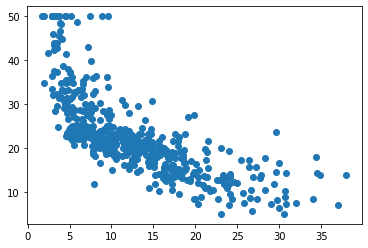

In [31]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target);

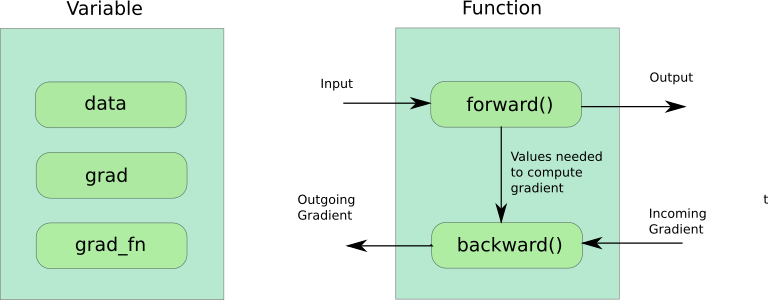

In [33]:
# Lets create tensors with "requires_grad=True", which means that we want to calculate gradietnts for this tensor
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / boston.data[:, -1].max(), dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

assert w.grad is None
assert b.grad is None

In [37]:
y_pred = w * x + b                    # make some operations
loss = torch.mean((y_pred - y) ** 2)  # make some operations
loss.backward()                       # calculate gradients with ".backward()"

# No we can see gradients
assert w.grad is not None
assert b.grad is not None

print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([1.0482])
dL/db = 
 tensor([-0.3607])


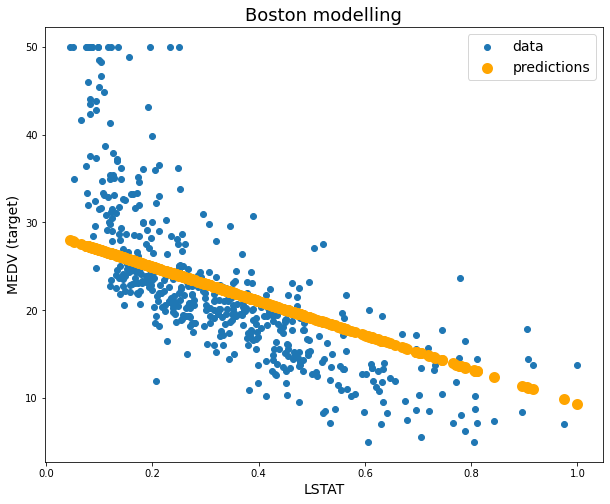

loss =  48.244892


In [36]:
from IPython.display import clear_output

for i in range(300):
    y_pred = w * x + b

    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    # make a step
    w.data -=  0.05 * w.grad# YOUR CODE
    b.data -=  0.05 * b.grad# YOUR CODE

    # zero gradients
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10,8))
        plt.scatter(x.data.numpy(), y.data.numpy(), label="data")
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color="orange", linewidth=5, label="predictions")
        plt.xlabel("LSTAT", fontsize=14)
        plt.ylabel("MEDV (target)", fontsize=14)
        plt.title("Boston modelling", fontsize=18)
        plt.legend(fontsize=14)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.1:
            print("Done!")
            break


### 4. Some details about learning pipeline

Before build your neural network, you need to think about how to train it. Firstly, you need to implement batching of your dataset

In order in this framework to be able to iterate over the data you need to create your own class inherited from `torch.utils.data.Dataset`.


You **need to implement** who methods: 

* `__len__` -- returns information about how many objects we have in the dataset
* `__getitem__` -- returns the sample and the target to it


Now let's write one ourselves, generate random data as a dataset.

In [38]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return {"sample": torch.tensor(x[idx, :], dtype=torch.float), "target": y[idx]}

In [39]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [40]:
our_dataset = RandomDataset(x, y)

In [40]:
our_dataset.__getitem__(1)

{'sample': tensor([0.7447, 0.7060, 0.7835, 0.9348, 0.7714]),
 'target': 0.6070174255738682}

In order to get batches from the data, pytorch uses such an entity as a dataloader, which accepts a class inherited from `torch.utils.data.Dataset` as input. Let's look at an example now:

In [41]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

In [42]:
batch = next(iter(dataloader))

print(f"Sample:\n{batch['sample']}")
print(f"Target:\n{batch['target']}")

Sample:
tensor([[0.9898, 0.7234, 0.8016, 0.2564, 0.1435],
        [0.3370, 0.8343, 0.6314, 0.3668, 0.5419],
        [0.0115, 0.7883, 0.3860, 0.2666, 0.7728],
        [0.4493, 0.3027, 0.3396, 0.2524, 0.8730]])
Target:
tensor([0.1673, 0.8304, 0.1785, 0.3952], dtype=torch.float64)


### 5. Build and apply simple fully connected nural network

#### Как сделать нейросеть


In order to create neural networks in high-level pytorch, the `nn` module is used. The neural network must be inherited from the `nn.Module` class. An example of how it might look

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

As we can see in this example, this class **must have a** method `forward`, which defines the direct passage of the neural network. Also from the class above you can see that the `nn` module contains the implementation of most of the layers, and the` nn.functional` module contains activation functions.

There is one more way to create a neural network and let's analyze it in practice:

In [44]:
from torch import nn

model = nn.Sequential()                   # create an empty model to which we will add layers
model.add_module("l1", nn.Linear(5, 10))  # added a layer with 5 neurons at the input and 3 at the output
model.add_module("l2", nn.ReLU())         # added activation function
model.add_module("l3", nn.Linear(10, 1))  # added a layer with 3 neurons at the input and 5 at the output

# альтернативный способ
another_model = nn.Sequential(
    nn.Linear(5, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

In [45]:
y_pred = model(batch['sample']) # получили предсказания модели

#### Как написать цикл обучения и отслеживать метрики
 
Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [46]:
import torchvision

# используем готовый класс от торча для загрузки данных для тренировки
mnist_train = torchvision.datasets.MNIST(
    "./mnist/", 
    train=True, 
    download=True, 
    transform=torchvision.transforms.ToTensor()
) 
mnist_val = torchvision.datasets.MNIST(
    "./mnist/",
    train=False, 
    download=True,
    transform=torchvision.transforms.ToTensor()
)

# так как это уже унаследованный от Dataset класс, его можно сразу обернуть в даталоадер
train_dataloader = torch.utils.data.DataLoader(
    mnist_train, 
    batch_size=4, 
    shuffle=True, 
    num_workers=1
) 

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, 
    batch_size=4, 
    shuffle=True, 
    num_workers=1
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



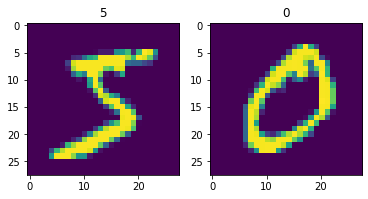

In [47]:
# посмотрим на то, с чем мы работаем
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [48]:
model = nn.Sequential(
    nn.Flatten(),             # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(28 * 28, 128),  # линейный слой, преобразующий вектор размера 784 в вектор размера 128
    nn.ReLU(),                # нелинейность
    nn.Linear(128, 10),       # линейный слой, преобразующий вектор размера 128 в вектор размера 10
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.SGD(model.parameters(), lr=0.05) 

Веса моделей хранятся в виде матриц и выглядят так:

In [49]:
[x for x in model.named_parameters()] 

[('1.weight',
  Parameter containing:
  tensor([[-3.2140e-02, -8.4204e-03, -2.1487e-02,  ..., -1.9979e-03,
           -2.3468e-02,  8.8618e-03],
          [ 9.5359e-05, -3.3867e-02,  3.0020e-02,  ...,  3.3641e-02,
            7.8909e-03,  1.8047e-02],
          [-3.5111e-02,  1.4090e-02, -9.6283e-03,  ..., -2.4859e-02,
            1.2049e-02,  3.2488e-02],
          ...,
          [-1.5216e-02,  2.0888e-03,  3.4990e-02,  ..., -3.3823e-02,
           -1.0707e-02, -3.1936e-02],
          [ 2.7549e-04, -9.7252e-03, -2.2349e-02,  ..., -5.7159e-03,
           -2.4479e-02,  1.4991e-02],
          [ 1.8558e-02,  2.8929e-03,  3.2095e-02,  ..., -2.8051e-02,
           -1.0487e-02,  2.5895e-02]], requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([-0.0244, -0.0031,  0.0027, -0.0292,  0.0221, -0.0307,  0.0350,  0.0106,
           0.0113,  0.0103, -0.0350, -0.0187, -0.0072,  0.0312, -0.0173,  0.0342,
           0.0250, -0.0307, -0.0047, -0.0176,  0.0337, -0.0121,  0.0224,  0.0112,


Можно перейти по ссылке и следить за нашей моделью прямо во время обучения!

In [51]:
from tqdm.notebook import tqdm

# всего у нас будет 5 эпох (5 раз подряд пройдемся по всем батчам из трейна)
for epoch in range(5):
    for x_train, y_train in tqdm(train_dataloader):    # берем батч из трейн лоадера
        y_pred = model(x_train)                        # делаем предсказания
        loss = F.cross_entropy(y_pred, y_train)        # считаем лосс
        loss.backward()                                # считаем градиенты обратным проходом
        optimizer.step()                               # обновляем параметры сети
        optimizer.zero_grad()                          # обнуляем посчитанные градиенты параметров
    
    if epoch % 2 == 0:
        val_loss = []                                  # сюда будем складывать **средний по бачу** лосс
        val_accuracy = []
        with torch.no_grad():                          # на валидации запрещаем фреймворку считать градиенты по параметрам
            for x_val, y_val in tqdm(val_dataloader):  # берем батч из вал лоадера
                y_pred = model(x_val)                  # делаем предсказания
                loss = F.cross_entropy(y_pred, y_val)  # считаем лосс
                val_loss.append(loss.numpy())          # добавляем в массив 
                val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
        
        # печатаем метрики
        print(f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}")

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, loss: 0.10866715013980865, accuracy: 0.9669


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, loss: 0.09341704100370407, accuracy: 0.971


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 4, loss: 0.08128217607736588, accuracy: 0.976


### 5. Introduction to conv nets [mini-presentation (continued)](https://docs.google.com/presentation/d/1cc9n11O6I_18bunhgw8qfuJ7kp2ITD9hfIZsp_8lpJA/edit?usp=sharing)

### 6. Build and apply simple convolutional nural network

In [ ]:
model = nn.Sequential(
    nn.Flatten(),             # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(28 * 28, 128),  # линейный слой, преобразующий вектор размера 784 в вектор размера 128
    nn.ReLU(),                # нелинейность
    nn.Linear(128, 10),       # линейный слой, преобразующий вектор размера 128 в вектор размера 10
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.SGD(model.parameters(), lr=0.05) 